In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# import dataset
train_knight_url = "../../subject/data04/Train_knight.csv"
test_knight_url = "../../subject/data04/Test_knight.csv"

train_knight_df = pd.read_csv(train_knight_url)
test_knight_df = pd.read_csv(test_knight_url)

train_knight_df.shape, test_knight_df.shape

((398, 31), (171, 30))

In [3]:
# split dataset to training and testing sets
X = train_knight_df.drop(columns=["knight"])
y = train_knight_df["knight"]
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (278, 30)
X_test shape: (120, 30)
y_train shape: (278,)
y_test shape: (120,)


In [4]:
model = DecisionTreeClassifier(criterion='gini')
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [5]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None}

In [6]:
model.fit(X_train, y_train)
# Checking F1 score
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.925)

In [7]:
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[44  2]
 [ 7 67]]
              precision    recall  f1-score   support

        Jedi       0.86      0.96      0.91        46
        Sith       0.97      0.91      0.94        74

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [8]:
X_train.columns

Index(['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity',
       'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash',
       'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship',
       'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims',
       'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst',
       'Grasping'],
      dtype='object')

In [9]:
model.feature_importances_

array([0.        , 0.01970177, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10667928, 0.        , 0.01016528,
       0.        , 0.        , 0.        , 0.        , 0.00498552,
       0.02178274, 0.        , 0.        , 0.02639495, 0.        ,
       0.        , 0.02683671, 0.72697046, 0.        , 0.03234076,
       0.        , 0.01016528, 0.        , 0.        , 0.01397726])

In [10]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fs[:15]

Stims            0.726970
Prescience       0.106679
Combo            0.032341
Evade            0.026837
Deflection       0.026395
Repulse          0.021783
Hability         0.019702
Grasping         0.013977
Attunement       0.010165
Midi-chlorien    0.010165
Survival         0.004986
Reactivity       0.000000
Recovery         0.000000
Burst            0.000000
Empowered        0.000000
dtype: float64

<Axes: xlabel='Stims', ylabel='Prescience'>

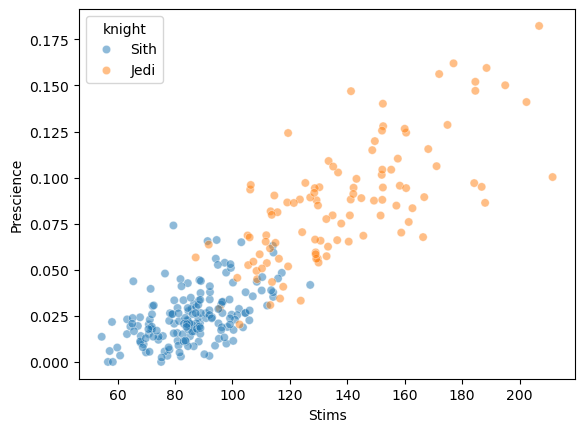

In [11]:
# plotting the most important features is Stims
# just two features Stims and Prescience can be used to predict the knight
# plotting scatter for Linear Regression
sns.scatterplot(x=X_train['Stims'], y=X_train['Prescience'], hue=y_train, alpha=0.5)

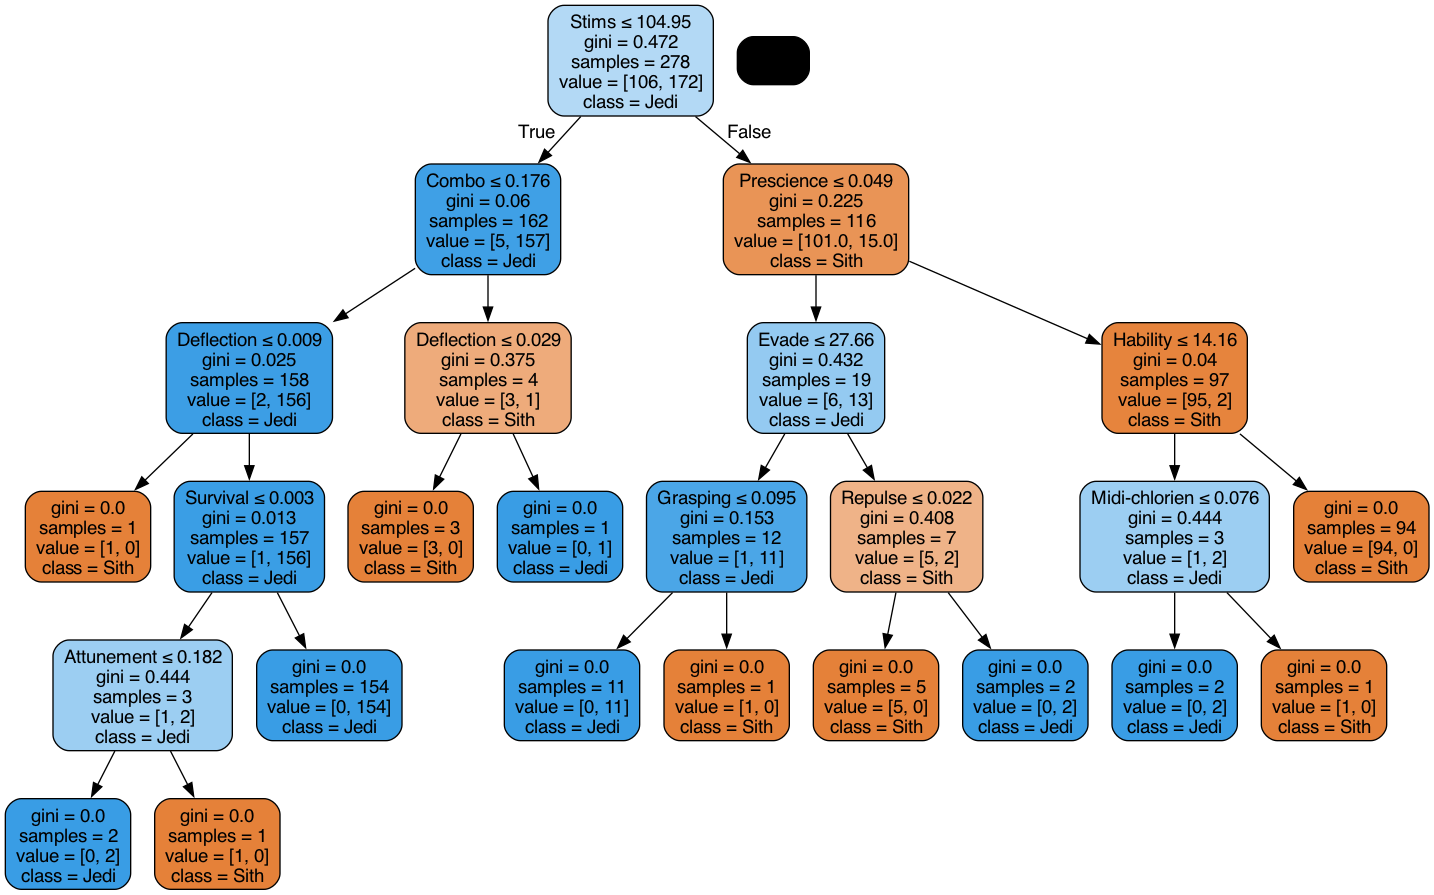

In [12]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Train a decision tree classifier
clf = DecisionTreeClassifier()
# Assuming X_train and y_train are defined
clf.fit(X_train, y_train)

# Use StringIO to capture the DOT output
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                feature_names=X_train.columns,
                class_names=y,
                filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph (e.g., in a Jupyter Notebook)
Image(graph.create_png())

## Use two features Stims and Prescience

In [13]:
fs.index

Index(['Stims', 'Prescience', 'Combo', 'Evade', 'Deflection', 'Repulse',
       'Hability', 'Grasping', 'Attunement', 'Midi-chlorien', 'Survival',
       'Reactivity', 'Recovery', 'Burst', 'Empowered', 'Delay', 'Strength',
       'Sprint', 'Power', 'Agility', 'Mass', 'Dexterity', 'Blocking',
       'Friendship', 'Awareness', 'Lightsaber', 'Pull', 'Push', 'Slash',
       'Sensitivity'],
      dtype='object')

In [14]:
for i in range(2, 8):
    cols = fs.index[:i]
    model.fit(X_train[cols], y_train)
    y_pred = model.predict(X_test[cols])
    print(f'Using {i} features: {cols.tolist()}')
    print(f'F1 Score: {metrics.f1_score(y_test, y_pred, average="weighted")}')

Using 2 features: ['Stims', 'Prescience']
F1 Score: 0.8683716965046888
Using 3 features: ['Stims', 'Prescience', 'Combo']
F1 Score: 0.9174571236945482
Using 4 features: ['Stims', 'Prescience', 'Combo', 'Evade']
F1 Score: 0.9337962962962962
Using 5 features: ['Stims', 'Prescience', 'Combo', 'Evade', 'Deflection']
F1 Score: 0.9337962962962962
Using 6 features: ['Stims', 'Prescience', 'Combo', 'Evade', 'Deflection', 'Repulse']
F1 Score: 0.9335859321869232
Using 7 features: ['Stims', 'Prescience', 'Combo', 'Evade', 'Deflection', 'Repulse', 'Hability']
F1 Score: 0.9256218008795329


In [15]:
# base number of features is 3
model.fit(X_train[fs.index[:3]], y_train)

y_pred = model.predict(test_knight_df[fs.index[:3]])
y_pred[:5]

array(['Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi'], dtype=object)

In [16]:
# --- Export to Tree.txt ---
import os
filename = os.path.join(os.getcwd(), 'Tree.txt')
with open(filename, 'w') as f:
    for k in y_pred:
        f.write(k + '\n')